### NAME : PRAJJWAL SINGH BAIS 
***

## <center>TASK 1: PREDICTION USING SUPERVISED MACHINE LEARNING </center>
### Predict the percentage of an student based on the no. of study hours. 
In this task we have to find the percentage scored by a student based on the hours they study. This is simple linear regression problem type because it has only two variables.This task can be done by using regression libraries 
<br>
So first we will import all the required Libraries for this task. 

In [93]:
#Importing Libraries for this Task
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [94]:
#Loading Dataset from remote url
url = "http://bit.ly/w-data"
sd = pd.read_csv(url)

#Retrieving first 10 rows from the Datasets
sd.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [95]:
#To check dataframe has null value
sd.isna()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Shape of Data

In [96]:
sd.shape

(25, 2)

### Data Information

In [97]:
sd_info = sd.info()
print(sd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


### Statistical Properties

In [98]:
#Summary Statistics and Dataframe information
sd_description = sd.describe()
print(sd.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


### Unique Values

In [78]:
#print Unique values
sd.nunique()

Hours     23
Scores    23
dtype: int64

### Data Visualization
Plotting a 2-D graph to visualize our Dataset. By visualizing the data one can see which relation is best describe for that data.  We can plot a graph using .plot() fuction from matplotlib Library.

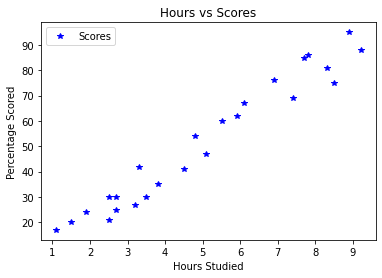

In [79]:
# Plotting distribution of score and hours on graph
sd.plot(x = 'Hours', y = 'Scores', style = '*', color = 'blue' )
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In the graph above, we can observe that there is a linear relation between Hours Studied and Percentage Scored.

<AxesSubplot:>

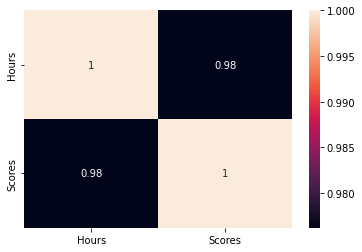

In [80]:
#Plotting correlation between feature and target
sns.heatmap(sd.corr(), annot = True, linecolor = 'black')

Here we can clearly see that there is strong positive correlation.

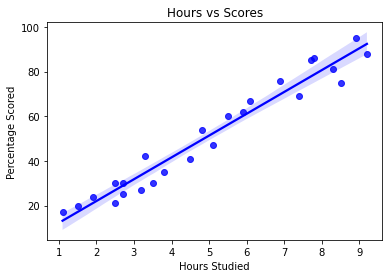

In [81]:
#Plotting regression plot to confirm above relationship between feature and target.
sns.regplot(x = sd['Hours'],y = sd['Scores'], data = sd, color='blue')
plt.title("Hours vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

From above graph  we can clearly see that there is positive linear relation between the number of hours studied and percentage of score.



## Data Preparation

### Dividing Data 
Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [82]:
X = sd.iloc[:, :-1].values  #Attributes
y = sd.iloc[:, 1].values    #Labels
print("Number of hours Studied = ",X[0:5])
print("Scores Obtained = ",y[0:5])

Number of hours Studied =  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
Scores Obtained =  [21 47 27 75 30]


### Splitting Data
Splitting the data for training and testing set. We'll perform this task by using Scikit-Learn's built-in train_test_split() method

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

Now we have training and testing dataset.

### Let's Train the Model 
We have split our data into training and testing sets, and now is finally the time to train our algorithm. by using Scikit-Learn's built-in LinearRegression() method

In [84]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In linear regression model the equation of the line is "Y = aX + c" where a is coefficient and c is intersept. After training our model we got most accurate values of coefficient and intersept.

In [85]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.78856669]
Intercept -  2.370815382341881


These Coefficient and Intersept values are used to predict the result.

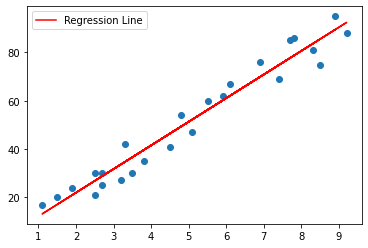

In [86]:
# Plotting the regression line
line = regressor.coef_ * X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red', label='Regression Line')
plt.legend()
plt.show()

It is clearly visible from the above graph that the regression line passes through almost all the points, which means that our model is trained accurately.

### Prediction Time

In [87]:
print(X_test) # Test data
y_pred = regressor.predict(X_test) #Predicted data

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [88]:
#Comparing the original and predicted values
sd=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
sd

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [89]:
#Training and Testing Scores
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9484997422695115
Test Score: 0.9568211104435257


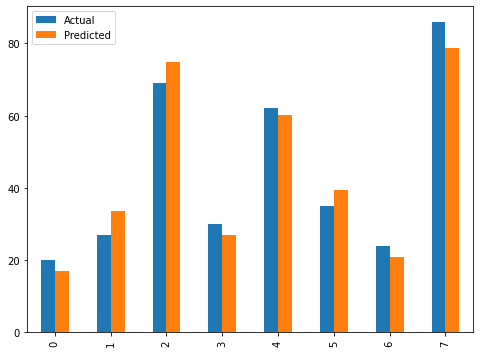

In [91]:
#plot of Actual and predicted values
sd.plot(kind='bar',figsize=(8,6))
plt.show()

### Testing with new Inputs
Providing Number of hours to the model to check how much percentage a student will score in in that number of hours

In [44]:
#Checking the predicted score of a who studies 9.25 hours a day
hours = float(input("Enter the Study Hours : "))
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the Study Hours : 9.25
No of Hours = 9.25
Predicted Score = 92.91505723477056


## Evaluation of the Model

Now we will Evaluate the perfomance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [46]:
#Importing metrics from scikit-learn library estimating the quality of predictions
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
R-2: 0.9568211104435257


The R-2 has a score of 0.9568 which means that the model has 95.68% accuracy which is very good.

It means the algoritm of our model is good.

# <center> THANK YOU!!!